# Notebook Regression - Diamonds price dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
import os as os

#### Imortation du jeu de données et affichage de l'entête

In [2]:
data_pd = pd.read_csv("diamonds.csv", na_values = '')
size_dataset = data_pd.shape
print( "Rows = ", size_dataset[0])
print( "Columns = ", size_dataset[1])
columns_reshape = ['Unnamed: 0','carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity','price']
data_pd = data_pd[columns_reshape]
data_pd.head()

Rows =  53940
Columns =  11


,Unnamed: 0,carat,depth,table,x,y,z,cut,color,clarity,price
0,1,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,326
1,2,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,326
2,3,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,327
3,4,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,334
4,5,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,335


In [3]:
data_pd.info()
index_num = ['carat', 'depth', 'table', 'x', 'y', 'z']
index_cat = ['cut', 'color', 'clarity']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   depth       53940 non-null  float64
 3   table       53940 non-null  float64
 4   x           53940 non-null  float64
 5   y           53940 non-null  float64
 6   z           53940 non-null  float64
 7   cut         53940 non-null  object 
 8   color       53940 non-null  object 
 9   clarity     53940 non-null  object 
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


In [5]:
print(data_pd.values[10])

[11 0.3 64.0 55.0 4.25 4.28 2.73 'Good' 'J' 'SI1' 339]


#### Mise en forme du jeu de données

In [6]:
data = data_pd.values
y = data[:,-1]

# ID de l'enregistrement
X_id = data[:,0]
# Données
X = data[:,1:-1]

print("X shape :", X.shape)
print("y shape : ", y.shape)

X shape : (53940, 9)
y shape :  (53940,)


from sklearn.preprocessing import LabelEncoder
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
data_encoded = data_pd.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

cols_for_corr = numerical_cols + categorical_cols 
corr_matrix = data_encoded[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma")
plt.title('Matrice de corrélation')
plt.show()
print("Matrice de corrélation pour alert:")
print(corr_matrix['alert'].sort_values(ascending=False))

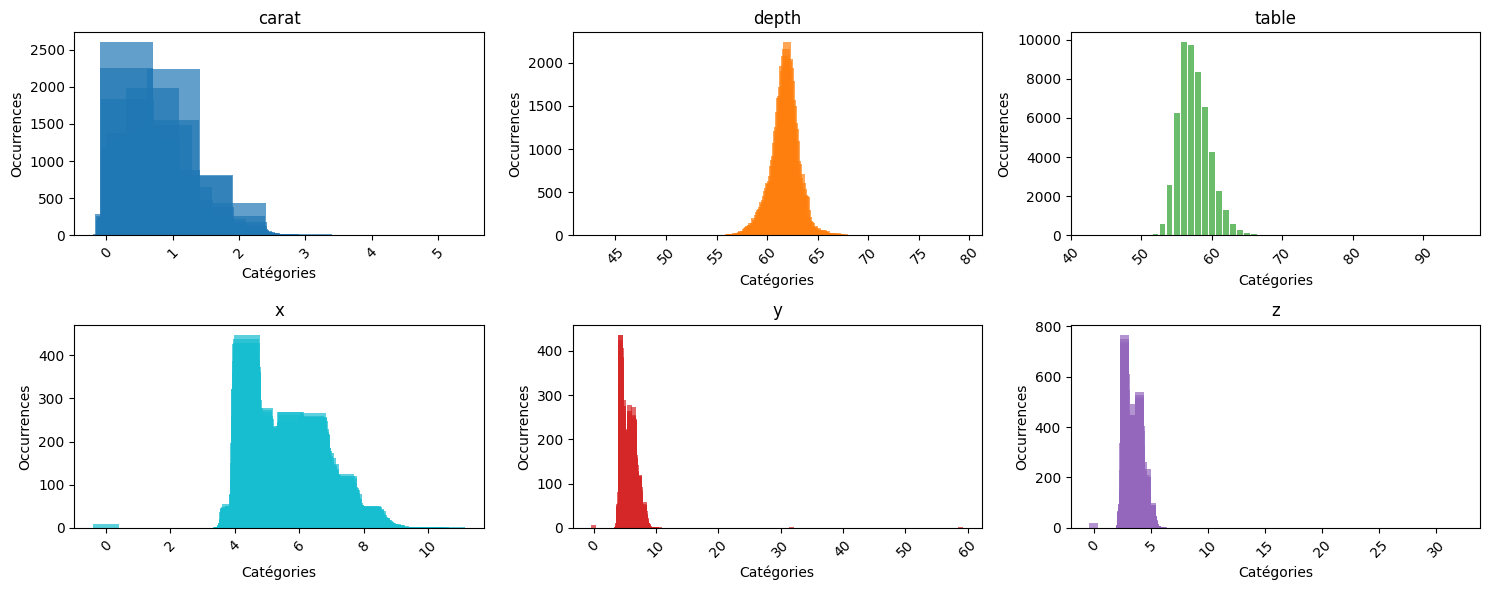

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan','tab:red','tab:purple' ] 
axes = axes.ravel()

for k in range(len(index_num)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]
    #unique, counts = np.unique(array, return_counts=True)
    unique, counts = np.unique(array, return_counts=True)
    #ax.hist(array, bins=10, color  = color, alpha= 0.7)
    ax.bar(unique, counts, color  = color, alpha= 0.7)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(index_num[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

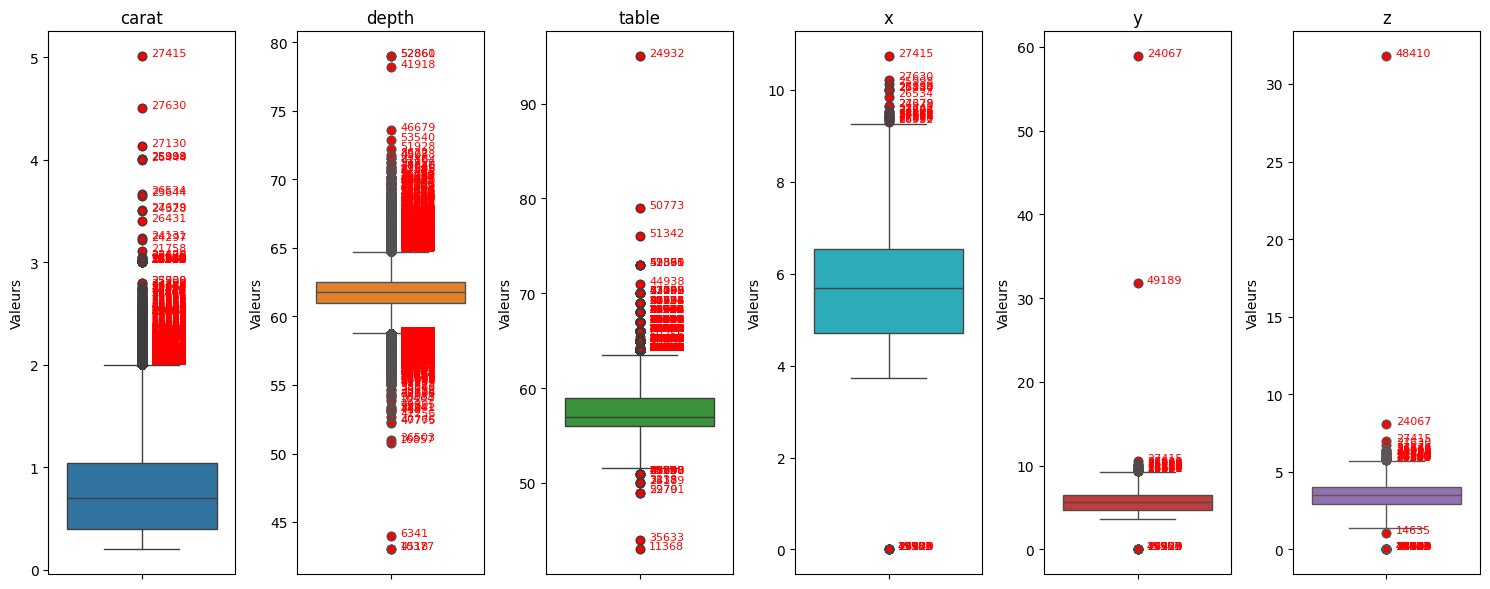

In [8]:
import seaborn as sns



fig, axes = plt.subplots(1, 6, figsize=(15, 6))
axes = axes.ravel()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:red', 'tab:purple']

for k in range(len(index_num)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]
    # Calcul Q1, Q3 et IQR
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1

    # Seuils outliers
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR

    outliers_index = np.where((array < low) | (array > high))[0]
    outliers_values = array[outliers_index]

    for i, (idx, val) in enumerate(zip(outliers_index, outliers_values)):
        ax.scatter(0, val, color='red')  # point
        ax.text(0.05, val, str(idx), fontsize=8, color='red')  # id

    sns.boxplot(y=array, ax=ax, color=color)
    ax.set_xlabel("")  # pas pertinent ici
    ax.set_ylabel("Valeurs")
    ax.set_title(columns_reshape[k+1])
    ax.tick_params(axis='x', labelbottom=False)  # Pas de labels x

plt.tight_layout()
plt.show()


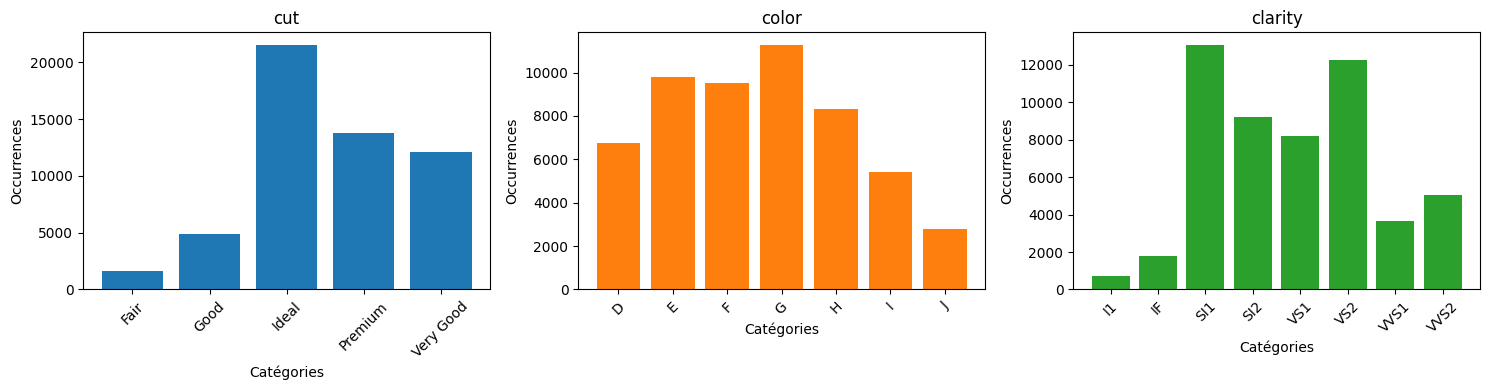

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green'] 

for k in range(len(index_cat)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k+6]
    unique, counts = np.unique(array, return_counts=True)

    ax.bar(unique, counts, color=color)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(index_cat[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

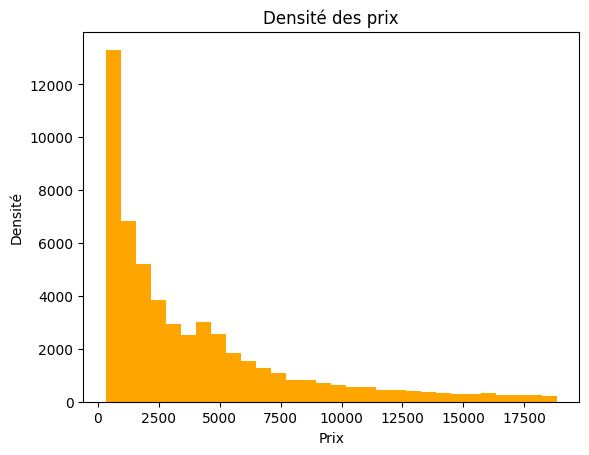

In [10]:

unique, counts = np.unique(y, return_counts=True)
#plt.bar(unique, counts)
plt.hist(y, bins = 30, color="orange")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.title("Densité des prix")

plt.show()



Corrélation avec le prix:
price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64


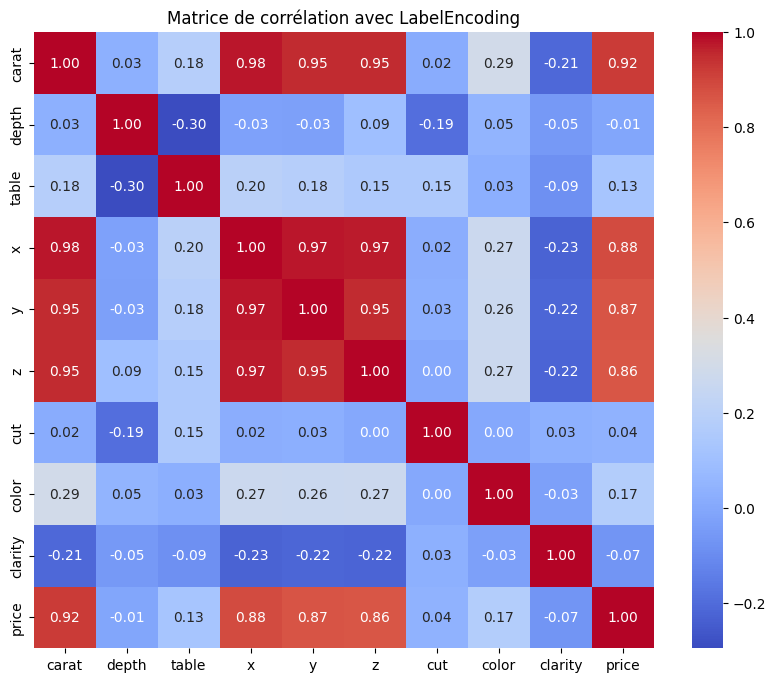

In [27]:

from sklearn.preprocessing import LabelEncoder

# Colonnes catégorielles et numériques
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Copier le dataset pour l'encoder
data_encoded = data_pd.copy()
label_encoders = {}

# Encoder les colonnes catégorielles
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_pd[col])
    label_encoders[col] = le

# Colonnes à inclure dans la corrélation
cols_for_corr = numerical_cols + categorical_cols + ['price']

# Calculer la matrice de corrélation
corr_matrix = data_encoded[cols_for_corr].corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation avec LabelEncoding")

# Corrélation avec le prix
print("Corrélation avec le prix:")
print(corr_matrix['price'].sort_values(ascending=False))


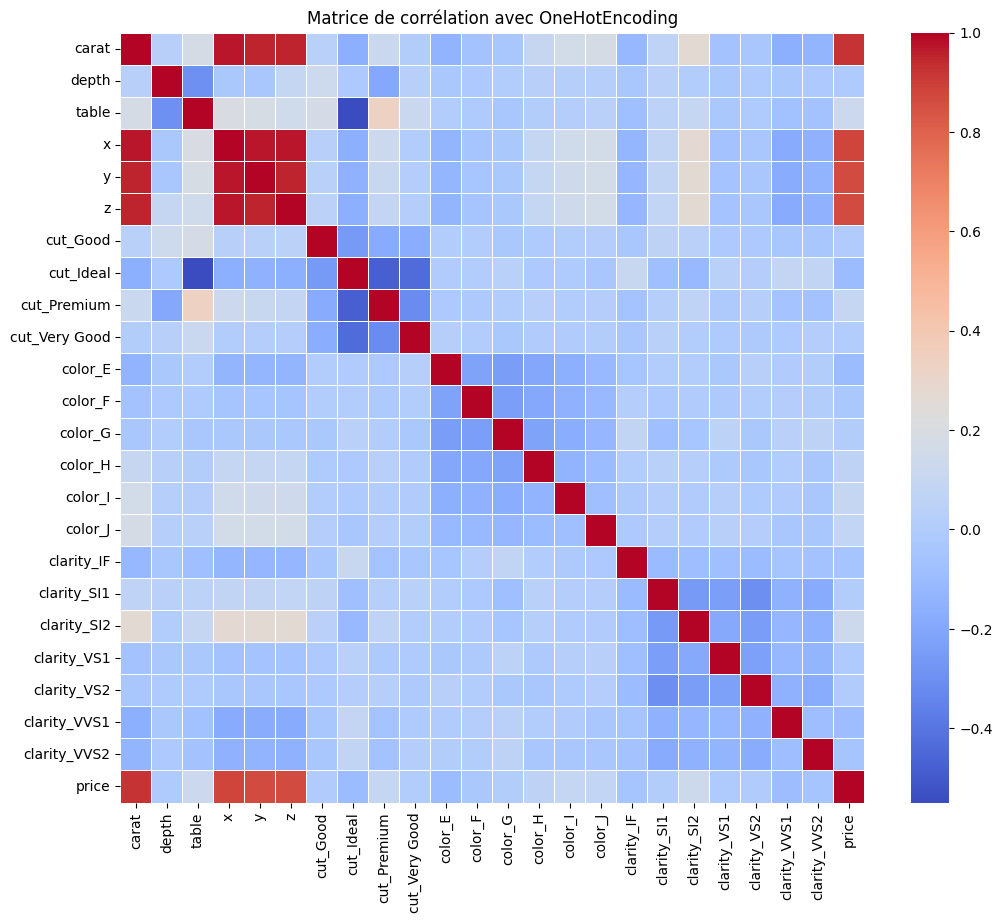

Corrélation avec le prix :
price            1.000000
carat            0.921591
x                0.884435
y                0.865421
z                0.861249
clarity_SI2      0.128420
table            0.127134
color_I          0.097125
cut_Premium      0.095706
color_J          0.081710
color_H          0.059223
clarity_SI1      0.008957
color_G          0.008556
cut_Very Good    0.006593
cut_Good        -0.000312
clarity_VS2     -0.001062
clarity_VS1     -0.009886
depth           -0.010647
color_F         -0.024161
clarity_IF      -0.049596
clarity_VVS2    -0.052381
clarity_VVS1    -0.095266
cut_Ideal       -0.097175
color_E         -0.101089
Name: price, dtype: float64


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Colonnes catégorielles et numériques
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# OneHotEncoder
enc = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' pour éviter la multicolinéarité
X_cat = enc.fit_transform(data_pd[categorical_cols])

# Générer les noms de colonnes pour les variables encodées
column_names = []
for i, cat in enumerate(enc.categories_):
    column_names.extend([f"{categorical_cols[i]}_{c}" for c in cat[1:]])  # [1:] à cause de drop='first'

# Créer un DataFrame pour les colonnes encodées
X_cat_df = pd.DataFrame(X_cat, columns=column_names, index=data_pd.index)

# Combiner les colonnes numériques, encodées et le prix
data_final = pd.concat([data_pd[numerical_cols], X_cat_df, data_pd['price']], axis=1)

# Calculer la matrice de corrélation
corr_matrix = data_final.corr()

# Afficher la heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation avec OneHotEncoding")
plt.show()

# Corrélation avec le prix
print("Corrélation avec le prix :")
print(corr_matrix['price'].sort_values(ascending=False))


#### Séparation de l'ensemble de test et d'apprentissage

In [28]:
from sklearn.model_selection import train_test_split

# DataFrame final pour X : colonnes numériques + colonnes catégorielles encodées
X = np.concatenate([data_pd[numerical_cols].values, X_cat], axis=1)

# Target continue : prix
y = data_pd['price'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (43152, 23)
X_test shape : (10788, 23)


#### Normalisation et centrage des données

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)        # Calcule la moyenne et l'écart-type sur l'ensemble d'entraînement
X_train_scaled = scaler.transform(X_train)  # Applique la standardisation
X_test_scaled  = scaler.transform(X_test)   # Applique la même transformation sur le test

In [31]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# LinearSVR
model_svr = LinearSVR(max_iter=5000)
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
    
print(f"Lineaire_SVR")
print(f"MAE: {mae_svr:.3f} | RMSE: {rmse_svr:.3f} | R²: {r2_svr:.3f}")

# RandomForestRegressor
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
    
print(f"RanfomForestRegressor")
print(f"MAE: {mae_rfr:.3f} | RMSE: {rmse_rfr:.3f} | R²: {r2_rfr:.3f}")

# XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBRegressor")
print(f"MAE: {mae_xgb:.3f} | RMSE: {rmse_xgb:.3f} | R²: {r2_xgb:.3f}")

Lineaire_SVR
MAE: 771.504 | RMSE: 1460.293 | R²: 0.866
RanfomForestRegressor
MAE: 295.311 | RMSE: 635.100 | R²: 0.975
XGBRegressor
MAE: 297.722 | RMSE: 579.610 | R²: 0.979


In [32]:
print("y_test min/max :", y_test.min(), y_test.max())
print("y_pred_rfr min/max :", y_pred_rfr.min(), y_pred_rfr.max())


y_test min/max : 335 18823
y_pred_rfr min/max : 371.7 17991.09


In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# La baseline prédit ici la moyenne des durées de vie observée dans le train
y_baseline = np.full_like(y_test, y_train.mean())


mae_b = mean_absolute_error(y_test, y_baseline)
rmse_b = np.sqrt(mean_squared_error(y_test, y_baseline))
r2_b = r2_score(y_test, y_baseline)

print(f"Baseline moyenne")
print(f"MAE: {mae_b:.3f} | RMSE: {rmse_b:.3f} | R²: {r2_b:.3f}")

# Tirage aléatoire entre min et max de y_train
np.random.seed(42)  
y_random = np.random.uniform(low=y_train.min(), high=y_train.max(), size=y_test.shape)

mae_rand = mean_absolute_error(y_test, y_random)
rmse_rand = np.sqrt(mean_squared_error(y_test, y_random))
r2_rand = r2_score(y_test, y_random)

print("Baseline tirage aléatoire")
print(f"MAE: {mae_rand:.3f} | RMSE: {rmse_rand:.3f} | R²: {r2_rand:.3f}")

Baseline moyenne
MAE: 3020.369 | RMSE: 3987.218 | R²: -0.000
Baseline tirage aléatoire
MAE: 7177.186 | RMSE: 8694.579 | R²: -3.755
